<a href="https://colab.research.google.com/github/simonsavine/school_projects/blob/main/trigonometrical_fit/trifit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

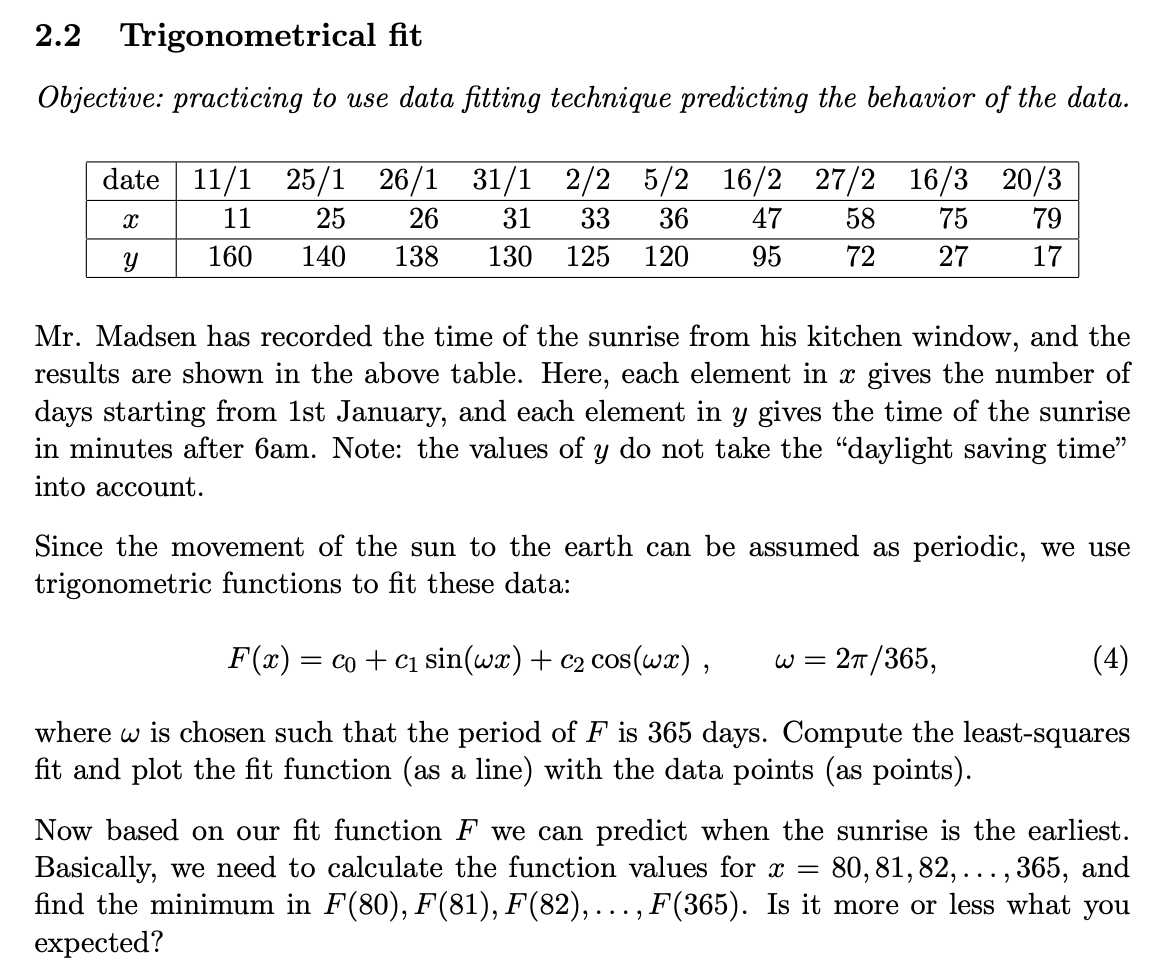

In [1]:
import numpy as np
import matplotlib.pyplot as plt

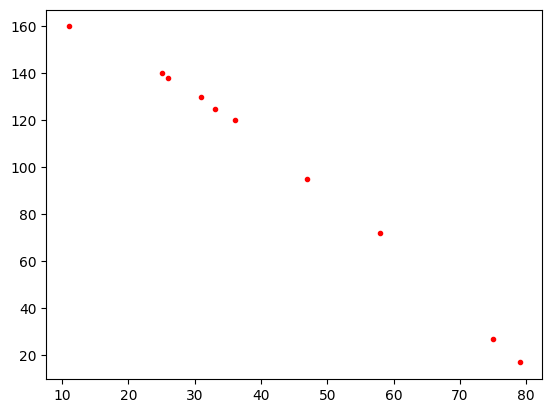

In [32]:
xs = [11, 25, 26, 31, 33, 36, 47, 58, 75, 79]
ys = [160, 140, 138, 130, 125, 120, 95, 72, 27, 17]
xs = np.array(xs)
ys = np.array(ys)
plt.plot(xs, ys, 'r.')

In [33]:
w = 2 * np.pi / 365

def buildA(x):
  n = len(x)
  A = np.zeros((n, 3))
  A[:, 0] = 1
  A[:, 1] = np.sin(w * x)
  A[:, 2] = np.cos (w * x)
  return A

def fit(A, y):
  c = np.linalg.solve(A.T @ A,  A.T @ y)
  assert len(c) == 3
  return c

A = buildA(xs)
c = fit(A, ys)
c

array([ 26.77224522, -40.49390279, 143.16124837])

In [34]:
pred = A @ c
err = pred - ys
mse = np.mean(err ** 2)
rmse = np.sqrt(mse)
assert np.isclose(pred.mean(), ys.mean())
r2 = np.var(pred) / np.var(ys)
rmse, r2

(0.7573938756006655, 0.9997336638363111)

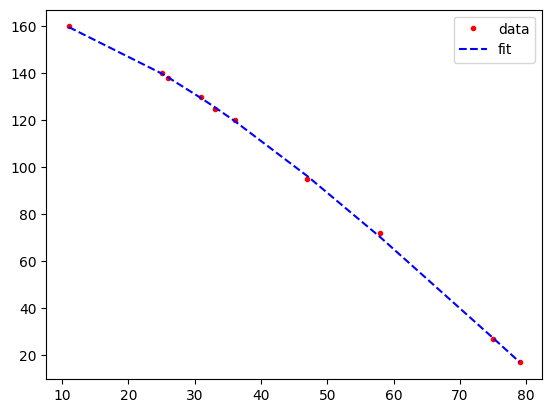

In [35]:
plt.plot(xs, ys, 'r.', label="data")
plt.plot(xs, pred, 'b--', label="fit")
plt.legend()

In [36]:
new_xs = np.arange(80, 366)
new_A = buildA(new_xs)
new_pred = new_A @ c

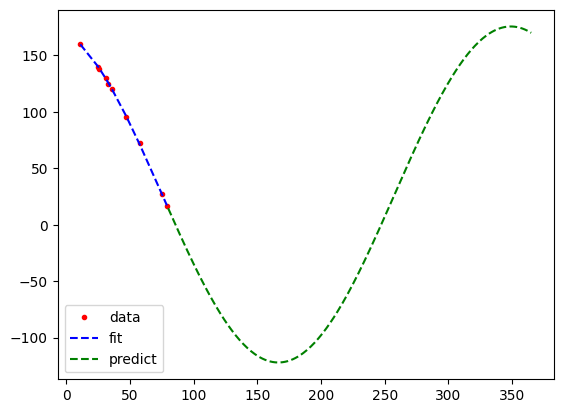

In [38]:
plt.plot(xs, ys, 'r.', label="data")
plt.plot(xs, pred, 'b--', label="fit")
plt.plot(new_xs, new_pred, 'g--', label="predict")
plt.legend()

In [31]:
mini = np.argmin(new_pred)
minx = new_xs[mini]
miny = new_pred[mini]
minx, miny

(166, -122.0005506984931)

The model predicts earliest sunrise on day 166, June 16th, at 3.58am. From https://www.worlddata.info/europe/denmark/sunset.php it seems that mid-June is effectively when sunrise is earliest, around 5am (this is 4am with DST)
The model is incredibly accurate in this prediction.